In [4]:
# prompt: install ace tools

!pip install ace-tools

In [6]:
import pandas as pd

# Original financial data for RideCo (revenue, legal expenses, operational expenses)
data = {
    "Quarter": [
        "31-03-2015", "30-06-2015", "30-09-2015", "31-12-2015", "31-03-2016",
        "30-06-2016", "30-09-2016", "31-12-2016", "31-03-2017", "30-06-2017",
        "30-09-2017", "31-12-2017", "31-03-2018", "30-06-2018", "30-09-2018",
        "31-12-2018", "31-03-2019", "30-06-2019", "30-09-2019", "31-12-2019",
        "31-03-2020", "30-06-2020", "30-09-2020", "31-12-2020"
    ],
    "Revenue (billions)": [
        1.75, 1.85, 2.66, 3.51, 3.05, 3.47, 4.79, 4.81, 4.6, 5.53,
        5.44, 5.86, 6.63, 5.97, 6.48, 7.48, 7.67, 8.75, 8.56, 8.72,
        10.58, 10.15, 10.72, 10.39
    ],
    "Legal Expenses (billions)": [
        0.05, 0.17, 0.11, 0.32, 0.28, 0.38, 0.41, 0.71, 0.59, 0.54,
        0.79, 0.65, 0.85, 0.7, 0.82, 1.03, 1.15, 1.15, 1.18, 1.23,
        1.17, 1.31, 1.39, 1.61
    ],
    "Operational Expenses (billions)": [
        0.8, 0.45, 1.35, 1.41, 1.59, 2.25, 2.65, 2.9, 2.64, 3.07,
        3.54, 4.01, 3.84, 4.21, 4.2, 4.45, 5.33, 5.76, 5.61, 6.21,
        6.29, 6.26, 6.83, 7.46
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Additional costs if drivers are employees:
# Assuming employee benefits and payroll taxes are 20% of revenue
# Reduced legal expenses if drivers are classified as employees (assume 25% reduction)

# Calculate additional costs and adjusted profit margin with employee model
df["Employee Benefits & Payroll Taxes (billions)"] = df["Revenue (billions)"] * 0.20
df["Adjusted Legal Expenses (billions)"] = df["Legal Expenses (billions)"] * 0.75
df["Total Expenses with Employee Model (billions)"] = (
    df["Employee Benefits & Payroll Taxes (billions)"] +
    df["Adjusted Legal Expenses (billions)"] +
    df["Operational Expenses (billions)"]
)

# Calculate profit margin with contractor model and employee model
df["Profit Margin Contractor Model (%)"] = (
    (df["Revenue (billions)"] - (df["Legal Expenses (billions)"] + df["Operational Expenses (billions)"])) /
    df["Revenue (billions)"] * 100
)
df["Profit Margin Employee Model (%)"] = (
    (df["Revenue (billions)"] - df["Total Expenses with Employee Model (billions)"]) /
    df["Revenue (billions)"] * 100
)

# Display results to user
import ace_tools as tools; tools.display_dataframe_to_user(name="Simulated Profit Impact on Employee Model", dataframe=df)


ModuleNotFoundError: No module named 'ace_tools'

In [7]:
# prompt: display the dataframe df without using ace tools

df

,Quarter,Revenue (billions),Legal Expenses (billions),Operational Expenses (billions),Employee Benefits & Payroll Taxes (billions),Adjusted Legal Expenses (billions),Total Expenses with Employee Model (billions),Profit Margin Contractor Model (%),Profit Margin Employee Model (%)
0,31-03-2015,1.75,0.05,0.80,0.350,0.0375,1.1875,51.428571,32.142857
1,30-06-2015,1.85,0.17,0.45,0.370,0.1275,0.9475,66.486486,48.783784
2,30-09-2015,2.66,0.11,1.35,0.532,0.0825,1.9645,45.112782,26.146617
3,31-12-2015,3.51,0.32,1.41,0.702,0.2400,2.3520,50.712251,32.991453
4,31-03-2016,3.05,0.28,1.59,0.610,0.2100,2.4100,38.688525,20.983607
5,30-06-2016,3.47,0.38,2.25,0.694,0.2850,3.2290,24.207493,6.945245
6,30-09-2016,4.79,0.41,2.65,0.958,0.3075,3.9155,36.116910,18.256785
7,31-12-2016,4.81,0.71,2.90,0.962,0.5325,4.3945,24.948025,8.638254
8,31-03-2017,4.60,0.59,2.64,0.920,0.4425,4.0025,29.782609,12.989130
9,30-06-2017,5.53,0.54,3.07,1.106,0.4050,4.5810,34.719711,17.160940


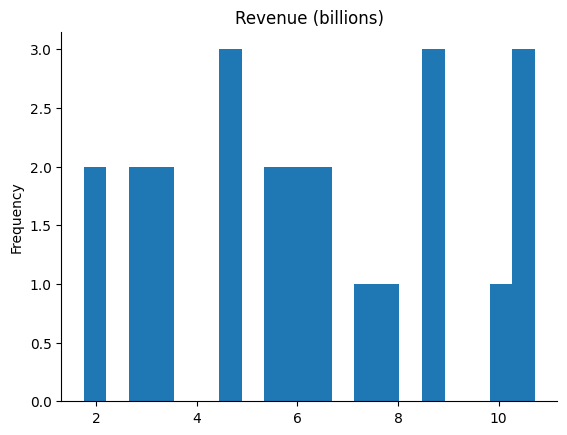

In [8]:
# @title Revenue (billions)

from matplotlib import pyplot as plt
df['Revenue (billions)'].plot(kind='hist', bins=20, title='Revenue (billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)

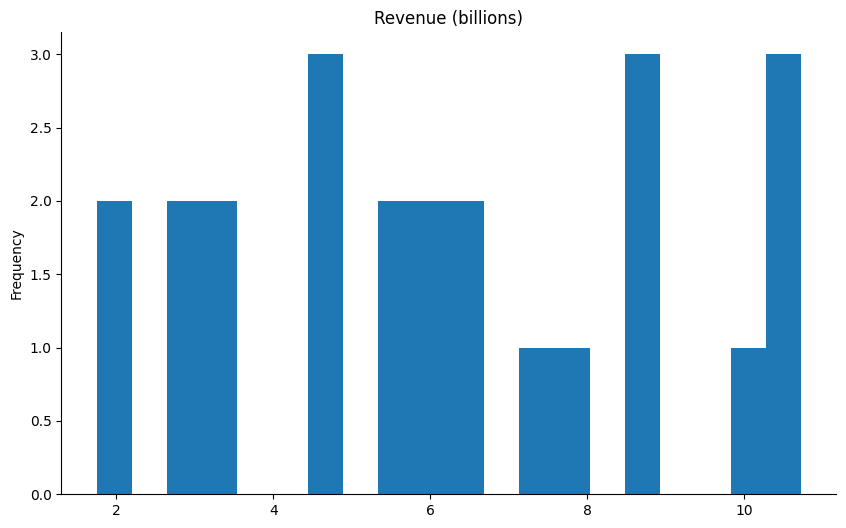

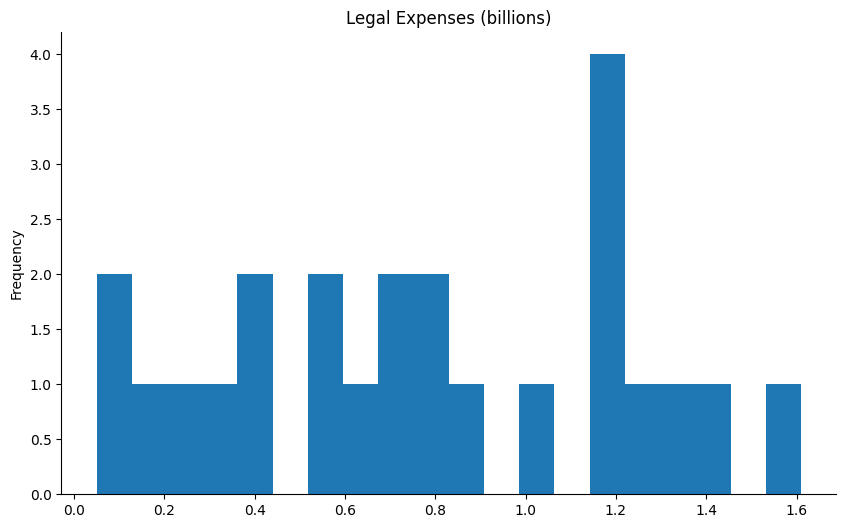

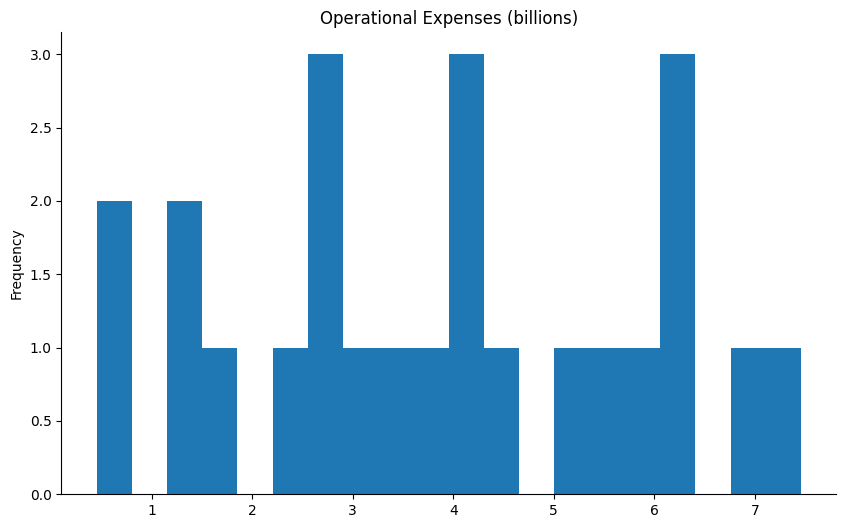

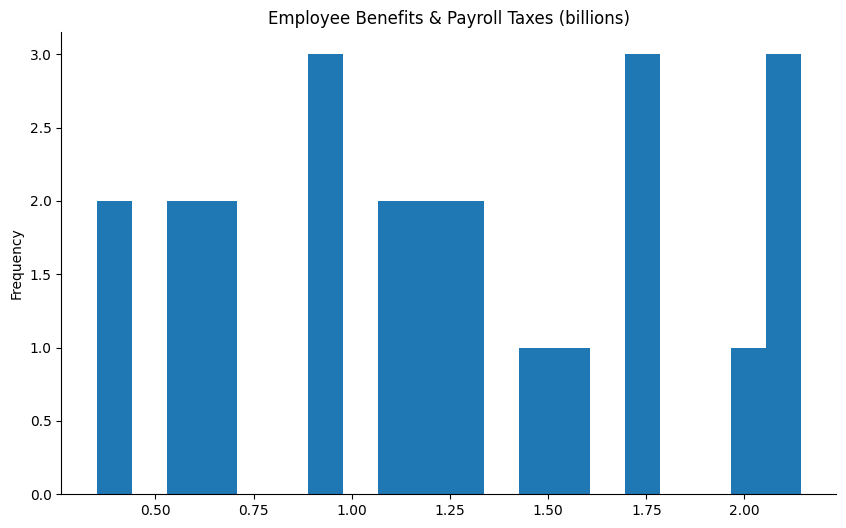

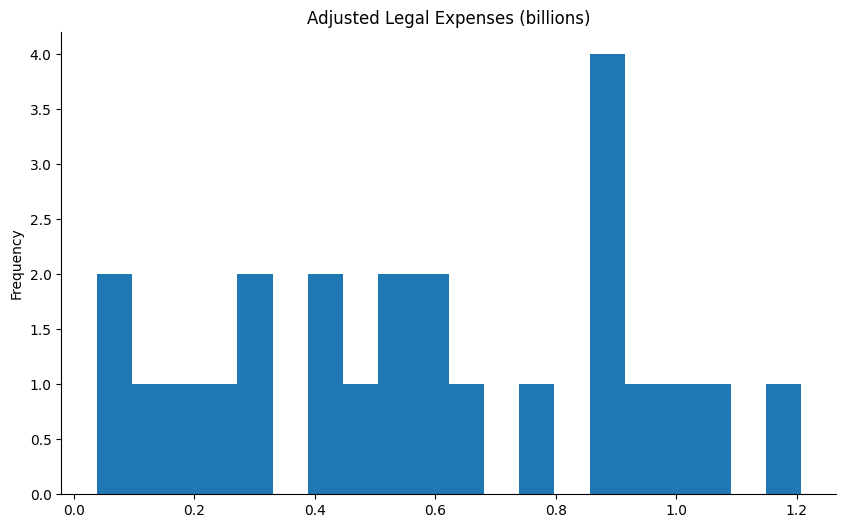

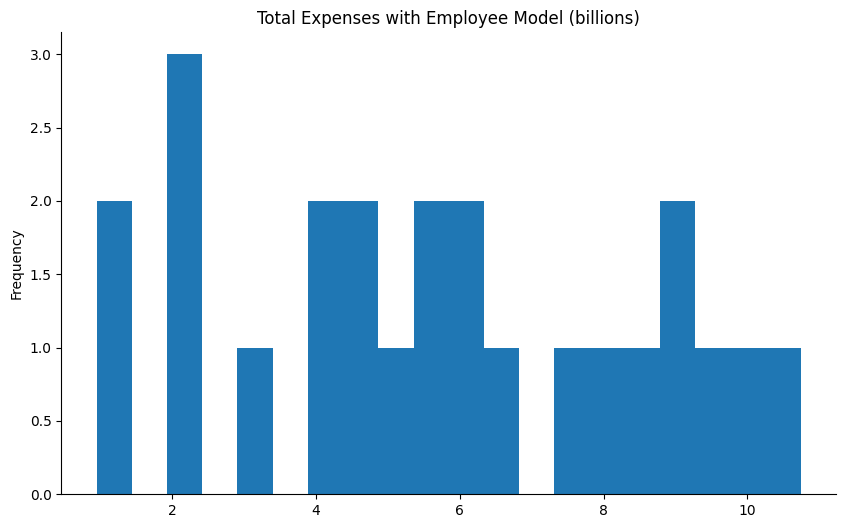

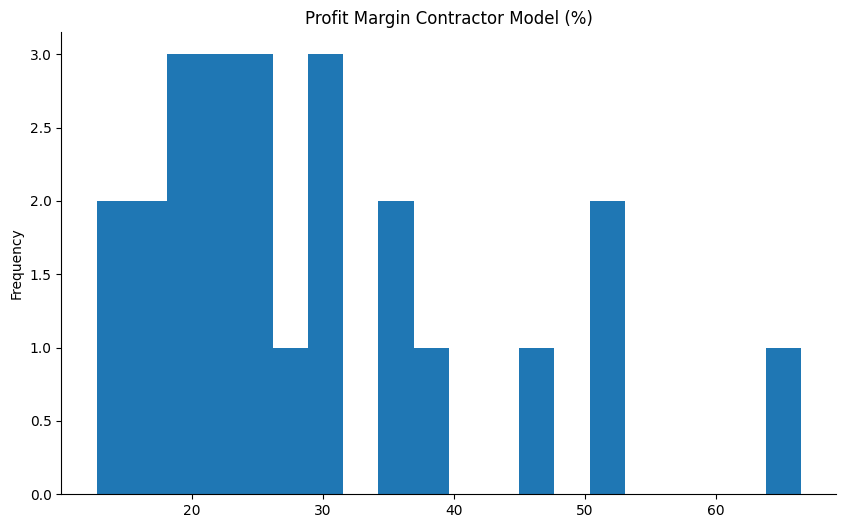

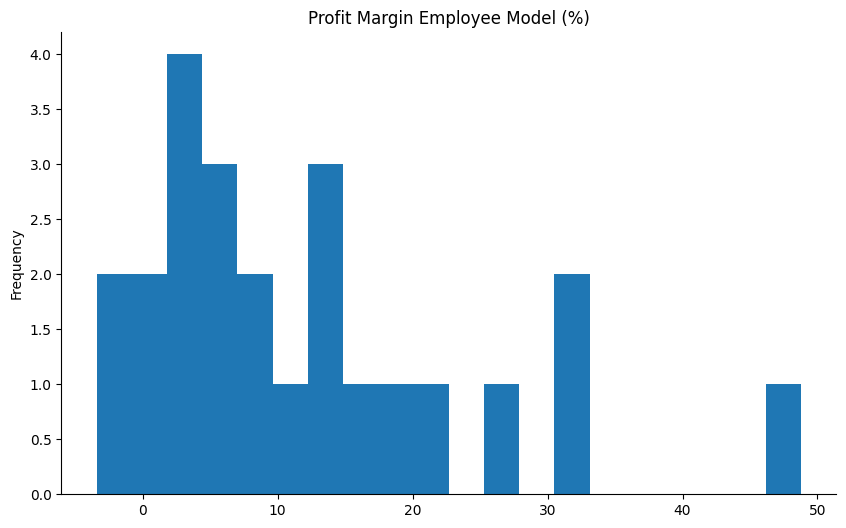

In [12]:
# prompt: individually display each chart for df
#import ace_tools as tools
import pandas as pd
#import ace_tools as tools; tools.display_dataframe_to_user(name="Simulated Profit Impact on Employee Model", dataframe=df)
from matplotlib import pyplot as plt


# Assuming you have already created the DataFrame 'df'

# @title Revenue (billions)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
df['Revenue (billions)'].plot(kind='hist', bins=20, title='Revenue (billions)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# @title Legal Expenses (billions)
plt.figure(figsize=(10, 6))
df['Legal Expenses (billions)'].plot(kind='hist', bins=20, title='Legal Expenses (billions)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# @title Operational Expenses (billions)
plt.figure(figsize=(10, 6))
df['Operational Expenses (billions)'].plot(kind='hist', bins=20, title='Operational Expenses (billions)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# @title Employee Benefits & Payroll Taxes (billions)
plt.figure(figsize=(10, 6))
df['Employee Benefits & Payroll Taxes (billions)'].plot(kind='hist', bins=20, title='Employee Benefits & Payroll Taxes (billions)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# @title Adjusted Legal Expenses (billions)
plt.figure(figsize=(10, 6))
df['Adjusted Legal Expenses (billions)'].plot(kind='hist', bins=20, title='Adjusted Legal Expenses (billions)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# @title Total Expenses with Employee Model (billions)
plt.figure(figsize=(10, 6))
df['Total Expenses with Employee Model (billions)'].plot(kind='hist', bins=20, title='Total Expenses with Employee Model (billions)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



# @title Profit Margin Contractor Model (%)
plt.figure(figsize=(10, 6))
df['Profit Margin Contractor Model (%)'].plot(kind='hist', bins=20, title='Profit Margin Contractor Model (%)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



# @title Profit Margin Employee Model (%)
plt.figure(figsize=(10, 6))
df['Profit Margin Employee Model (%)'].plot(kind='hist', bins=20, title='Profit Margin Employee Model (%)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

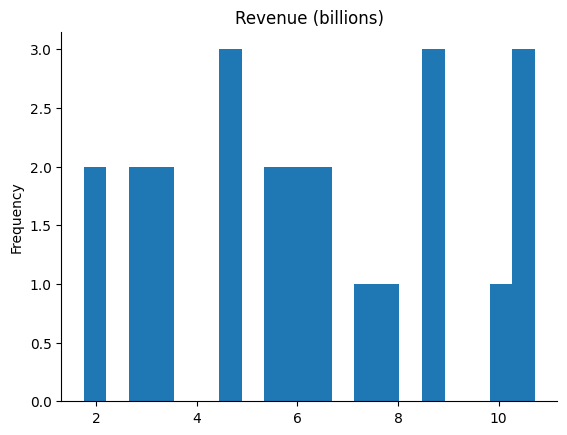

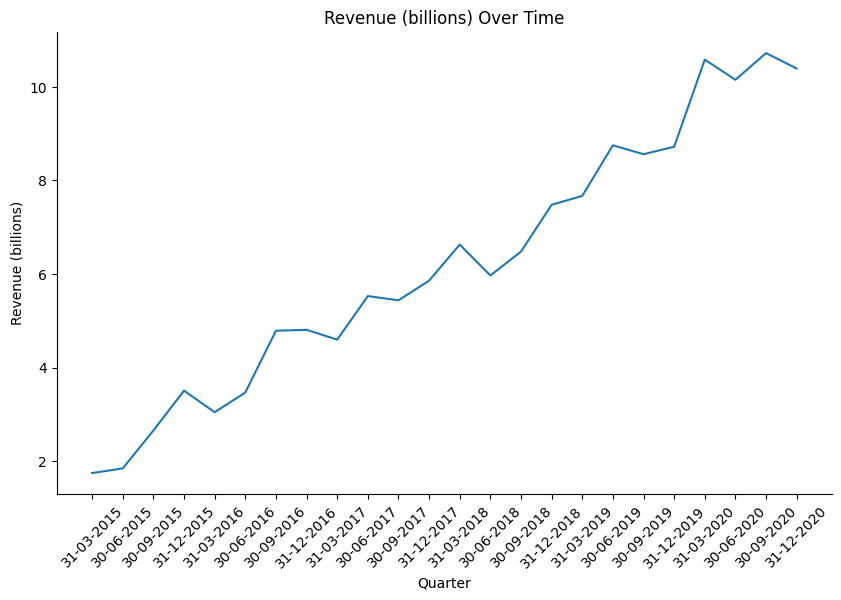

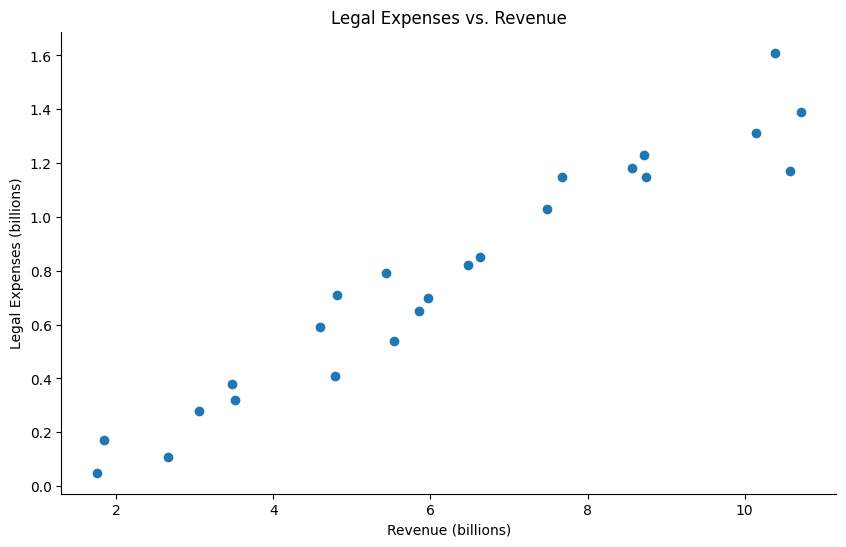

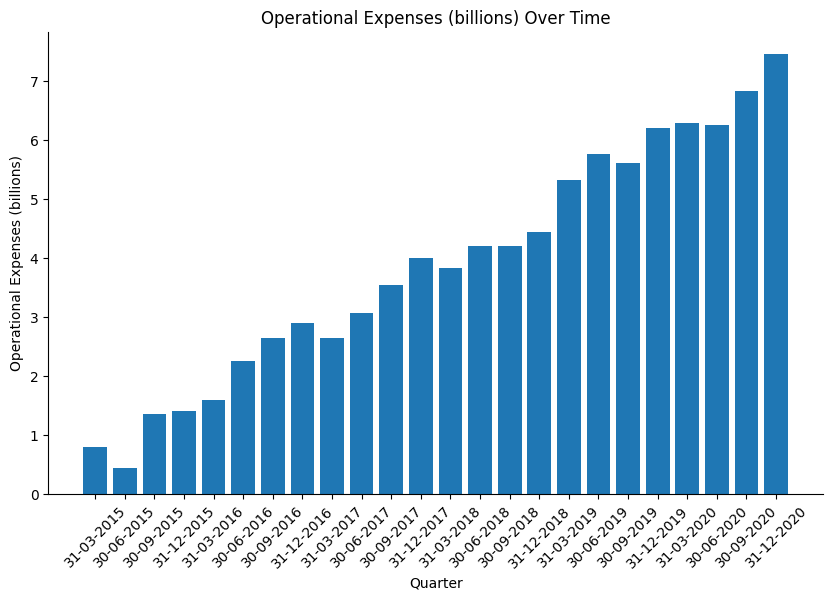

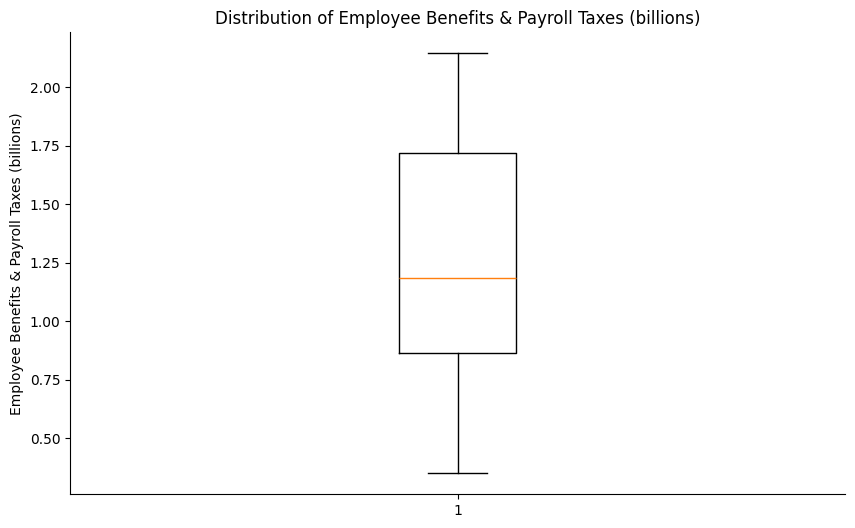

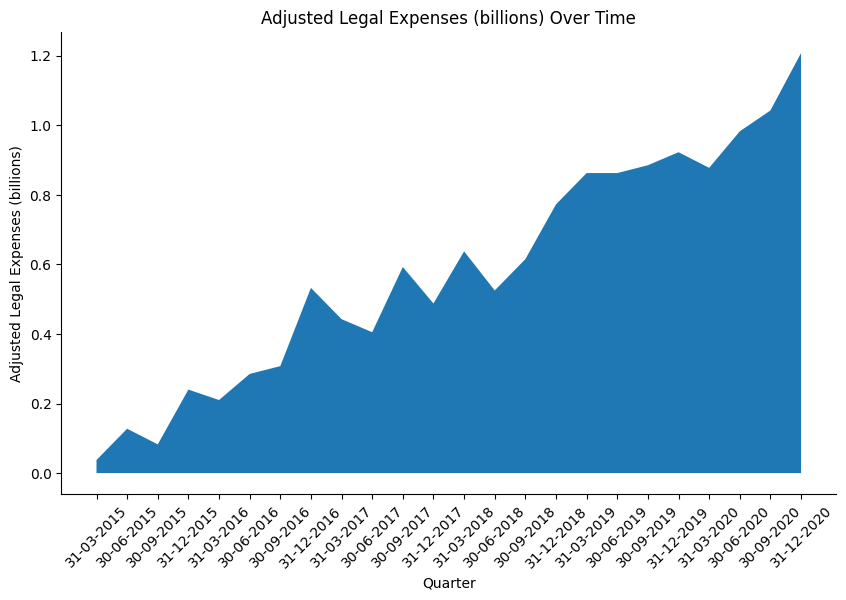

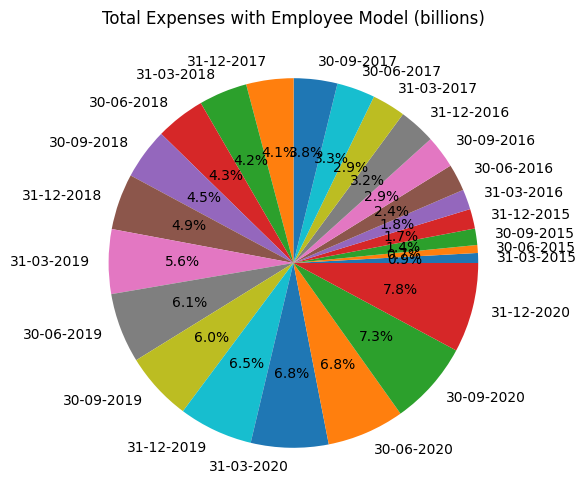

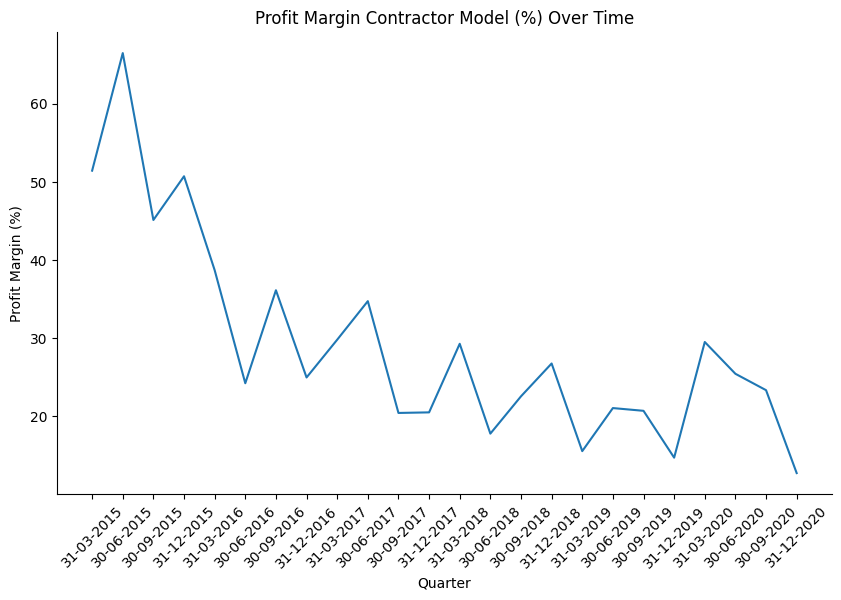

KeyError: 'Revenue (billions))'

<Figure size 1000x600 with 0 Axes>

In [14]:
# prompt: generate other charts also

import matplotlib.pyplot as plt

import pandas as pd
#import ace_tools as tools; tools.display_dataframe_to_user(name="Simulated Profit Impact on Employee Model", dataframe=df)
from matplotlib import pyplot as plt

!pip install ace-tools

# Original financial data for RideCo (revenue, legal expenses, operational expenses)
data = {
    "Quarter": [
        "31-03-2015", "30-06-2015", "30-09-2015", "31-12-2015", "31-03-2016",
        "30-06-2016", "30-09-2016", "31-12-2016", "31-03-2017", "30-06-2017",
        "30-09-2017", "31-12-2017", "31-03-2018", "30-06-2018", "30-09-2018",
        "31-12-2018", "31-03-2019", "30-06-2019", "30-09-2019", "31-12-2019",
        "31-03-2020", "30-06-2020", "30-09-2020", "31-12-2020"
    ],
    "Revenue (billions)": [
        1.75, 1.85, 2.66, 3.51, 3.05, 3.47, 4.79, 4.81, 4.6, 5.53,
        5.44, 5.86, 6.63, 5.97, 6.48, 7.48, 7.67, 8.75, 8.56, 8.72,
        10.58, 10.15, 10.72, 10.39
    ],
    "Legal Expenses (billions)": [
        0.05, 0.17, 0.11, 0.32, 0.28, 0.38, 0.41, 0.71, 0.59, 0.54,
        0.79, 0.65, 0.85, 0.7, 0.82, 1.03, 1.15, 1.15, 1.18, 1.23,
        1.17, 1.31, 1.39, 1.61
    ],
    "Operational Expenses (billions)": [
        0.8, 0.45, 1.35, 1.41, 1.59, 2.25, 2.65, 2.9, 2.64, 3.07,
        3.54, 4.01, 3.84, 4.21, 4.2, 4.45, 5.33, 5.76, 5.61, 6.21,
        6.29, 6.26, 6.83, 7.46
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Additional costs if drivers are employees:
# Assuming employee benefits and payroll taxes are 20% of revenue
# Reduced legal expenses if drivers are classified as employees (assume 25% reduction)

# Calculate additional costs and adjusted profit margin with employee model
df["Employee Benefits & Payroll Taxes (billions)"] = df["Revenue (billions)"] * 0.20
df["Adjusted Legal Expenses (billions)"] = df["Legal Expenses (billions)"] * 0.75
df["Total Expenses with Employee Model (billions)"] = (
    df["Employee Benefits & Payroll Taxes (billions)"] +
    df["Adjusted Legal Expenses (billions)"] +
    df["Operational Expenses (billions)"]
)

# Calculate profit margin with contractor model and employee model
df["Profit Margin Contractor Model (%)"] = (
    (df["Revenue (billions)"] - (df["Legal Expenses (billions)"] + df["Operational Expenses (billions)"])) /
    df["Revenue (billions)"] * 100
)
df["Profit Margin Employee Model (%)"] = (
    (df["Revenue (billions)"] - df["Total Expenses with Employee Model (billions)"]) /
    df["Revenue (billions)"] * 100
)

# Display results to user


df
# @title Revenue (billions)

df['Revenue (billions)'].plot(kind='hist', bins=20, title='Revenue (billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)
#import ace_tools as tools
#import ace_tools as tools; tools.display_dataframe_to_user(name="Simulated Profit Impact on Employee Model", dataframe=df)


# Assuming you have already created the DataFrame 'df'

# @title Revenue (billions) - Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Quarter'], df['Revenue (billions)'])
plt.title('Revenue (billions) Over Time')
plt.xlabel('Quarter')
plt.ylabel('Revenue (billions)')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# @title Legal Expenses (billions) - Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Revenue (billions)'], df['Legal Expenses (billions)'])
plt.title('Legal Expenses vs. Revenue')
plt.xlabel('Revenue (billions)')
plt.ylabel('Legal Expenses (billions)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# @title Operational Expenses (billions) - Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(df['Quarter'], df['Operational Expenses (billions)'])
plt.title('Operational Expenses (billions) Over Time')
plt.xlabel('Quarter')
plt.ylabel('Operational Expenses (billions)')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# @title Employee Benefits & Payroll Taxes (billions) - Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Employee Benefits & Payroll Taxes (billions)'])
plt.title('Distribution of Employee Benefits & Payroll Taxes (billions)')
plt.ylabel('Employee Benefits & Payroll Taxes (billions)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# @title Adjusted Legal Expenses (billions) - Area Plot
plt.figure(figsize=(10, 6))
plt.fill_between(df['Quarter'], df['Adjusted Legal Expenses (billions)'])
plt.title('Adjusted Legal Expenses (billions) Over Time')
plt.xlabel('Quarter')
plt.ylabel('Adjusted Legal Expenses (billions)')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# @title Total Expenses with Employee Model (billions) - Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(df['Total Expenses with Employee Model (billions)'], labels=df['Quarter'], autopct='%1.1f%%')
plt.title('Total Expenses with Employee Model (billions)')
plt.show()



# @title Profit Margin Contractor Model (%) - Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Quarter'], df['Profit Margin Contractor Model (%)'])
plt.title('Profit Margin Contractor Model (%) Over Time')
plt.xlabel('Quarter')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



# @title Profit Margin Employee Model (%) - Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Revenue (billions))'], df['Profit Margin Employee Model (%)'])
plt.title('Profit Margin Employee Model (%) vs. Revenue')
plt.xlabel('Revenue (billions)')
plt.ylabel('Profit Margin (%)')
plt.gca().spines[['top', 'right']].set_visible(False)